<a href="https://colab.research.google.com/github/Alejandro3009/ADA-Informes/blob/main/Sub_arreglo_maximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Max sub-array***

#1. Descripción del problema

El problema propuesto es el siguiente, se entrega un arreglo de tamaño $n$ el cual contiene una serie de números, con estos datos podemos partir este arreglo y encontrar dentro de un sub-arreglo el cual contenga la mayor suma de estos datos entre sí.

* Entrada: un arreglo de tamaño $n$ con una secuencia de números $[a_1,a_2,a_3,...,a_n]$.

* Salida: un par de índices los cuales sean estén posicionados dentro del arreglo original para así recrear nuestro sub-arreglo, la suma de todos los valores dentro del sub-arreglo.

este problema es bastante diferente a los que hemos visto anteriormente, ya que en este hace falta hacer el mismo análisis que al arreglo original $(A)$ solamente que a las dos particiones creadas $(B,C)$, encontrar los índices de los máximos sub-arreglo de $B$ y $C$, para luego devolver estos índices para encontrar el sub-arreglo máximo de $A$.

Y este este tipo de problema podría ser visto a la hora de querer ver irregularidades en planas de energía o médicas, ya que en estas se puede saber que tanto voltaje en promedio pasa por un circuito o que tantas pulsaciones por segundo realiza el corazón, y cualquier aumento o caída en estos valores serian registradas.


#2. Descripción del algoritmo

El algoritmo que estaremos utilizando para resolver este problema es uno que usa el paradigma de divide y vencerás.

*  ***Divide y vencerás*:** la idea del paradigma reside en la idea de que al reducir el tamaño del problema este se vuelve más fácil de resolver, para luego volver en nuestros pasos hasta llegar al problema original.

este algoritmo como bien dice el paradigma va a reducir el tamaño del arreglo original (en este caso se dividirá en dos), estos sub-arreglos serán resueltos y a partir de estas soluciones encontraremos la solución al problema original.


In [ ]:
import random
import copy

def subArregloMaximo (A,verbose):
  if(verbose):
    print("se llama a la funcion maxMitad con un arreglo que va desde la posicion ",0," hasta la ",len(A)//2)
    print("o dicho de otra forma el lado izquierdo del arreglo original")
    minB,maxB,sumaB = maxMitad(A[0:len(A)//2],verbose) ##obtener el mayor sub-arreglo izquierdo
    print("se llama a la funcion maxMitad con un arreglo que va desde la posicion ",len(A)//2," hasta la ",len(A))
    print("o dicho de otra forma el lado derecho del arreglo original")
    minC,maxC,sumaC = maxMitad(A[len(A)//2:len(A)],verbose) ##obtener el mayor sub-arreglo derecho
  else:  
    minB,maxB,sumaB = maxMitad(A[0:len(A)//2],verbose) ##obtener el mayor sub-arreglo izquierdo
    minC,maxC,sumaC = maxMitad(A[len(A)//2:len(A)],verbose) ##obtener el mayor sub-arreglo derecho

  if(verbose):
    print("ahora que tenemos ambos sub-arreglos y se indices toma el indice mas bajo y el indice mas alto")
    print("y se busca el mayor sub-arreglo entre ellos \n")
  
  minA,maxA,sumaA = maxMitad(A[maxB:(minC+(len(A)//2))],verbose)

  if(verbose):
    print("ahora comparamos a los sub-arreglos para encontrar el mayor entre ellos")
  if(sumaA > sumaB and sumaA > sumaC):
    return minA,maxA+len(A)//2,sumaA
  elif(sumaB > sumaC):
    return minB,maxB,sumaB
  return minC,maxC,sumaC



def maxMitad(A,verbose):
  indice_Menor = 0 ##variable que guarda el indice del sub-arreglo con la mayor diferencia
  indice_Mayor = 0 ##variable que guarda el indice del sub-arreglo con la mayor diferencia
  indiceA = 0
  indiceB = 0
  min = 0
  max = 0
  suma = 0 ## va sumando los valores del arreglos en cada iteracion
  anterior = 0 ## guarda el valor de la iteracion anterior
  diferencia = 0 ## en esta variable se guarda la suma mas grande que haya hasta el momento

  for i in range(0,len(A)):
    suma = suma + A[i]

    if(anterior < suma and anterior != 0 and min == 0):
      if(verbose):
        print("el punto mas bajo de un nuevo sub-arreglo ",anterior)
      min = anterior
      indiceA = i - 1

    elif(anterior > suma and min != 0):
      if(verbose):
        print("el punto mas alto de un nuevo sub-arreglo ",anterior,"\n")
      max = anterior
      indiceB = i - 1
    
    if(min != 0 and max != 0):
      min = abs(min) - abs(max)

      min = abs(min)

      if(verbose):
        print("ahora comparemos el nuevo sub-arreglo con el que hemos encontrado anteriormente para ver quien es mayor")
        print("amplitud de sub-arreglo nuevo: ",min)
        print("amplitud del maximo encontrado hasta el momento: ",diferencia,"\n")
      if(diferencia < min):
        if(verbose):
          print("el nuevo sub-arreglo es mayor asi que lo guardaremos como el mayor y reiniciaremos las variables \n")
        diferencia = min

        indice_Menor = indiceA
        indice_Mayor = indiceB

        min = 0
        max = 0
        anterior = 0
        suma = 0
      elif(diferencia > min):
        if(verbose):
          print("el sub-arreglo que se encontro anteriormente es mayor asi que seguimos buscando por un sub-arreglo que sea mayor a este \n")
        
        min = 0
        max = 0
        anterior = 0
        suma = 0

    anterior = suma
  if(verbose):
    print("se encontro el maximo sub-arreglo \n")
    print("Indice menor: ", indice_Menor)
    print("Indice mayor: ", j)
    print("Suma de subarreglo: ", diferencia)
  return indice_Menor, indice_Mayor, diferencia

array = random.sample(range(-20,20),14)
print("algoritmo de entrada: \n",array)
i, j, suma = subArregloMaximo(array,False) # En el grafico de la guia low era el inicio del arreglo y high el final
print("Indice menor: ", i)
print("Indice mayor: ", j)
print("Suma de subarreglo: ", suma)

Indice menor:  1
Indice mayor:  2
Suma de subarreglo:  9


Entonces para recapitular lo voy a detallar el paso a paso de cada función:

###2.1.1. Función subArregloMaximo

1. la función recibe un arreglo de tamaño n junto a su índice inicial, medio y final.

2. esta va a hacer dos llamadas de la función **maxMitad** acá una dándole una mitad del arreglo (primera llamada $A[inicio, mitad]$, segunda llamada $A[mitad, final]$).

3. una vez la función **maxMitad** le devuelva los dos índices de los sub-arreglos de ambas mitades, este va a calcular el sub-arreglo medio entre estos dos.

4. la función luego va analizar cual sub-arreglo es mayor y lo retornara junto con su valor e índices.

###2.1.2. Función maxMitad

1. la función al ser llamada por **subArregloMaximo** y esta va a recibir la partición del arreglo y su tamaño máximo.

2. luego este va a empezar a sumar los valores dentro del sub-arreglo hasta encontrar un punto (o índice) en el que estos empiecen a crecer.

3. al encontrar este punto ahora el algoritmo empezara a buscar el punto (o índice) en que dejen de crecer, una vez se encuentra ese punto, ya tenemos los puntos (o índices) ahora tenemos un sub-arreglo candidato a ser el que tenga la mayor suma dentro de nuestra partición.

4. ahora lo que se hace es encontrar la diferencia que existe entre el punto más bajo y el punto más alto del sub-arreglo.

5. esta diferencia entre los puntos del sub-arreglo la vamos a comparar con la diferencia del sub-arreglo más grande encontrado hasta el momento.

6. si la diferencia anterior es mayor a la actual, el sub-arreglo anterior sigue siendo el más grande hasta el momento por lo tanto lo dejamos guardado.

7. si la diferencia anterior es menor a la actual, el sub-arreglo encontrado es mayor al que se tenía guardado previamente, por lo tanto, se guarda los índices 
y la diferencia del nuevo sub-arreglo el cual es más grande encontrado hasta el momento.

8. se repite el proceso desde el $paso 2$ y una vez recorrida toda la partición se devuelven los índices y la diferencia que existe entre ambos a la función **subArregloMaximo**.


##2.2. Ejecución paso a paso

a continuación, se ejecutará el algoritmo viendo el paso a paso de este para resolver un cierto problema, esta opción se habilita cuando $verbose = True$


In [ ]:
import random

array = random.sample(range(-20,20),14)
print("algoritmo de entrada: \n",array)
i, j, suma = subArregloMaximo(array,True) # En el grafico de la guia low era el inicio del arreglo y high el final
print("Indice menor: ", i)
print("Indice mayor: ", j)
print("Suma de subarreglo: ", suma)

se llama a la funcion maxMitad con un arreglo que va desde la posicion  0  hasta la  7
o dicho de otra forma el lado izquierdo del arreglo original
el punto mas bajo de un nuevo sub-arreglo  -26
el punto mas alto de un nuevo sub-arreglo  -18 

ahora comparemos el nuevo sub-arreglo con el que hemos encontrado anteriormente para ver quien es mayor
amplitud de sub-arreglo nuevo:  8
amplitud del maximo encontrado hasta el momento:  0 

el nuevo sub-arreglo es mayor asi que lo guardaremos como el mayor y reiniciaremos las variables 

el punto mas bajo de un nuevo sub-arreglo  3
el punto mas alto de un nuevo sub-arreglo  7 

ahora comparemos el nuevo sub-arreglo con el que hemos encontrado anteriormente para ver quien es mayor
amplitud de sub-arreglo nuevo:  4
amplitud del maximo encontrado hasta el momento:  8 

el sub-arreglo que se encontro anteriormente es mayor asi que seguimos buscando por un sub-arreglo que sea mayor a este 

se encontro el maximo sub-arreglo 

Indice menor:  1
Indice

#3. Tiempo de Ejecución

El problema del sub-arreglo máximo puede ser implementado de distintas maneras, cada manera con un tiempo de ejecución distinto a los anteriores, pero ninguno de estos depende del como estén los datos, quiero decir que no existe diferencia alguna entre un supuesto $mejor$ o $peor$ caso, ambos presentan el mismo tiempo de ejecución. Esto es debido a que no existen situaciones en ambos casos que produzcan que ocurran más iteraciones o menos. 
La forma en que fue implementado este algoritmo antes es llamada "divide y vencerás", esto significa que el arreglo se va a dividir recursivamente a la mitad y cuando no pueda seguir dividiéndose se van a comenzar a sumar sus valores para buscar la suma mayor a medida que se van volviendo a unir los sub-arreglos.
Por la forma en que esto se realiza, dividir constantemente para luego recorrer todos estos datos de forma lineal, tenemos que esta forma de implementación tiene la forma de $T(n) = 2T(n/2) + O(n)$ que es equivalente a $O(nlogn)$.


# 4.1 Correctitud de MaxSubArrayMid
## Teorema

La función MaxSubArrayMid retorna el subarreglo máximo que pasa por el medio del arreglo de entrada.

## Prueba del teorema

En cada iteración, se realiza un paso en el recorrido del arreglo desde el medio hacia una posición más cercana al inicio o el final, según la mitad. Asumiendo que *m* es el medio del arreglo y *s* el valor máximo, probaremos la siguiente propiedad invariante:
> Al final de cada iteración, *s* es la suma máxima hasta ese punto.

## Inicialización
Al final de la primera iteración (*i = 0*), el elemento en la posición *m - 0* es la suma máxima, y como el subarreglo debe tener al menos un elemento, se cumple la propiedad.

## Mantención
Aplicando inducción, se puede asumir que al comienzo de cada iteración, *s* es la suma máxima hasta la posición anterior a *i*. Para mantener la propiedad, los elementos entre *m* y *m ± i* se suman y luego se comparan el valor de *s*. Si el valor de la nueva suma es mayor a *s*, su valor se actualiza y se seguirá cumpliendo la propiedad invariante.

## Correctitud
La propiedad invariante es verdadera al inicio del bucle y se mantiene en cada iteración. Por lo tanto, se puede decir que al finalizar el algoritmo, el resultado será un subarreglo con la suma máxima desde la posición *m* hasta *m ± n/2*.

# 4.2 Correctitud de MaxSubArray
## Teorema
El algoritmo *maxSubArray* recibe un arreglo de n elementos y retorna el subarreglo que contiene el valor máximo al sumar todos sus elementos contiguos.

## Prueba del teorema
**Caso base:** Cuando sólo hay un elemento en el arreglo, el elemento máximo es el único que contiene. Por lo tanto, retorna este elemento.

**Caso general (n>1):** Se asume que *maxSubArray* es correcto si el tamaño del arreglo es m < n.

El algoritmo divide el arreglo en 2 mitades de largo n/2 si n > 1, y luego las procesa utilizando el mismo algoritmo. Como el tamaño de los algoritmos es menor a la del arreglo original, se cumple que m < n.


#5. Experimentos

##5.1. Comparación del algoritmo

En este experimento vamos a comparar el algoritmo creado en este informe con el algoritmo kadane, este algoritmo lleva a cabo la misma tarea que el algoritmo max sub-array, pero a diferencia de este kadane no es recursivo.


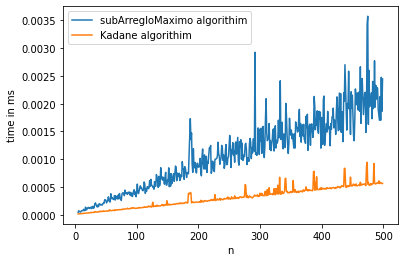

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
x1=[]; y1=[]

for n in range(5,500):

  a = random.sample(range(-1000, 1000), n)

  #la función repeat está ejecutando 20 veces cada algoritmo con el arreglo a y retorna el mejor tiepo obtenido para cada uno.
  t = repeat(setup="from __main__ import subArregloMaximo", stmt=f"subArregloMaximo({a}, {False})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  t = repeat(setup="from __main__ import kadane", stmt=f"kadane({a},{len(a)})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)


plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["subArregloMaximo algorithim", "Kadane algorithim"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

###Análisis

Como se apreciar el algoritmo kadane es más efectivo que el método recursivo, y se intenta decir cuál es la complejidad de este algoritmo, entonces es probable que este sea $O(n)$ mientras que el método recursivo posiblemente sea $O(n log(n)$.


##5.2. Correctitud de los valores entregados por el algoritmo

en el siguiente experimento comprobaremos lo correcto que son los valores que entrega el algoritmo **subArregloMaximo** a comparación del algoritmo **kadane**.

el motivo que se utilizó al **algoritmo kadane** como base para hacer la comparación de correctitud del algoritmo **subArregloMaximo**, es por ser un método ya comprobado de ser funcional y por su eficacia a la hora de resolver el problema.


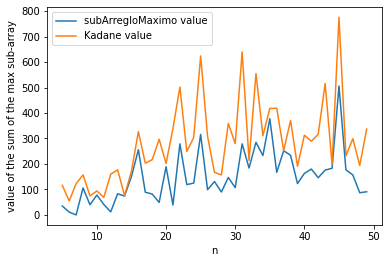

In [ ]:
import matplotlib.pyplot as plt
import random

x=[]; y=[]
x1=[]; y1=[]

for n in range(5,50):

  a = random.sample(range(-100, 100), n)
  
  min,max,sum = subArregloMaximo(a,False)

  x.append(n)
  y.append(sum)

  sum = kadane(a,len(a))

  x1.append(n)
  y1.append(sum)


plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["subArregloMaximo value", "Kadane value"])

plt.xlabel('n')
plt.ylabel('value of the sum of the max sub-array')
plt.show()

###Análisis

Como se puede ver en la gráfica, el algoritmo entrega valores que en promedio son menores a los valores esperados.

esto puede ser debido a una diferencia de análisis del problema, mientras que el algoritmo kadane está enfocado en encontrar dos puntos entre los cuales la suma de sus valores maximice la suma, mientras que el enfoque del algoritmo creado en este informe es de encontrar dos puntos entre los cuales se maximice la diferencia entre sus valores.

#6. Anexos

##6.1. Algoritmo kadane

El código que se ve a continuación es una implementación del algoritmo kadane necesario para poder hacer el experimento 5.1.


In [ ]:
# Python program to print largest contiguous array sum
  
from sys import maxsize
  
# Function to find the maximum contiguous subarray
# and print its starting and end index
def kadane(a,size):
  
  max_so_far = -maxsize - 1
  max_ending_here = 0
  start = 0
  end = 0
  s = 0
  
  for i in range(0,size):
  
    max_ending_here += a[i]
  
    if max_so_far < max_ending_here:
        max_so_far = max_ending_here
        start = s
        end = i
  
    if max_ending_here < 0:
        max_ending_here = 0
        s = i+1

  return max_so_far
  
    # print ("Maximum contiguous sum is %d"%(max_so_far))
    # print ("Starting Index %d"%(start))
    # print ("Ending Index %d"%(end))